In [1]:
import QuantLib as ql
import plotly.express as px
import pandas as pd
from IPython.core.display import Image
from jupyterUtils import exportPlotlyFigure, export
asdf =1

# USD LIBOR and EURIBOR zero curves

The purpose of the notebook is to plot the zero rates of the USD LIBOR and EURIBOR zero curve for the effective date 10th of May 2019 which is used for pricing throughout this thesis.

In [2]:
today = ql.Date(10, ql.May, 2019)
ql.Settings.instance().evaluationDate = today

We import the market data object for the two curves which are set up in the market data package of the library developed for this thesis.

In [3]:
from marketdata.interestRateCurves import LiborCurve
euribor6m = LiborCurve.EURIBOR6M.value
usdlibor3m = LiborCurve.USDLIBOR3M.value

usdlibor3m.__class__

QuantLib.QuantLib.YieldTermStructureHandle

The curves are built as core QuantLib objects which offers a functionality to infer zero rates.

In [4]:
end = today + ql.Period(30, ql.Years)
# dates is just a list of all days until 30 years in the future
dates = [ql.Date(serial) for serial in range((today+ql.Period(4, ql.Days)).serialNumber(), end.serialNumber()+1)]
zero_rates_euribor = [euribor6m.zeroRate(d, ql.Actual360(), ql.Continuous).rate() for d in dates]
zero_rates_usd_libor = [usdlibor3m.zeroRate(d, ql.Actual360(), ql.Continuous).rate() for d in dates]

When plotting these zero rates we do yield

In [5]:
def plotdf(y, x, legend):
    df = pd.DataFrame()
    df['Zero Rate'] = y
    df['Date'] = [d.to_date() for d in x]
    df['Legend'] = legend
    return df

plot_data = plotdf(zero_rates_usd_libor, dates, 'USD LIBOR 3M Zero Curve')\
    .append(plotdf(zero_rates_euribor, dates, 'EURIBOR 6M Zero Curve'))

In [6]:
fig = px.line(plot_data, x = 'Date', y = 'Zero Rate', color = 'Legend')

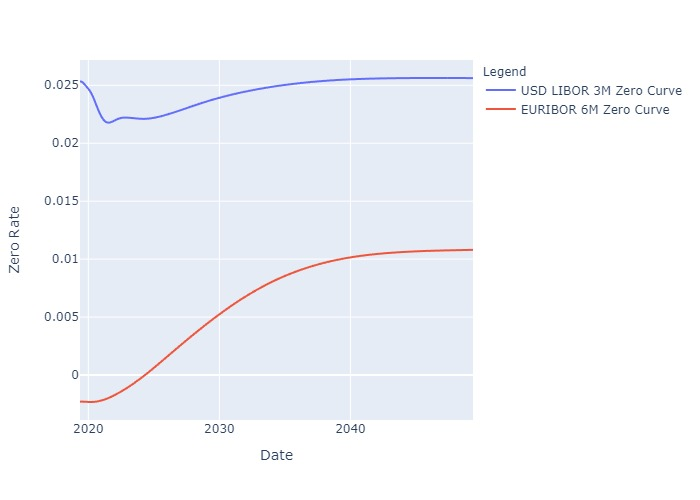

In [7]:
exportPlotlyFigure(fig, 'EURIBOR_and_LIBOR_curve')
img_bytes = fig.to_image(format='jpeg')
Image(img_bytes)

# plot(zero_rates_euribor, dates, 'EURIBOR 6M Zero Curve')
# plot(zero_rates_usd_libor, dates, 'USD LIBOR 3M Zero Curve')

In [8]:
export("Diplay of USD LIBOR and EURIBOR zero curves.ipynb")